In [2]:
import pandas as pd


In [3]:
ref_path = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/BCFTOOLS_CONCAT_TAB/PSEUDOPOOL/merge.txt.gz"
ref = pd.read_csv(ref_path, compression="gzip", sep="\t",)
ref["GlobalSample"] = ref_path.split("/")[-2]

sanity_check_path = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/BCFTOOLS_CONCAT_TAB/Random_for_sanity_check/merge.txt.gz"
sanity_check_ref = pd.read_csv(sanity_check_path, compression="gzip", sep="\t")
sanity_check_ref["GlobalSample"] = sanity_check_path.split("/")[-2]

ref = pd.concat([ref, sanity_check_ref])

ref["ID"] = "chr" + ref["ID"]
ref

,ID,AC,AF,SAMPLE,GlobalSample
0,chr10:11070:C:T,4,0.000625,NA18989,PSEUDOPOOL
1,chr10:11481:T:A,105,0.016396,NA18989,PSEUDOPOOL
2,chr10:13198:C:T,9,0.001405,NA18989,PSEUDOPOOL
3,chr10:13525:T:C,16,0.002498,NA18989,PSEUDOPOOL
4,chr10:98474:T:C,18,0.002811,NA18989,PSEUDOPOOL
...,...,...,...,...,...
4330971,chrX:156027150:C:G,133,0.020768,HG03567,Random_for_sanity_check
4330972,chrX:156028131:C:T,150,0.023423,HG03567,Random_for_sanity_check
4330973,chrX:156028470:T:C,122,0.019051,HG03567,Random_for_sanity_check
4330974,chrX:156029506:C:T,84,0.013117,HG03567,Random_for_sanity_check


In [4]:
ref.groupby(["GlobalSample", "SAMPLE"])["ID"].count()

GlobalSample             SAMPLE 
PSEUDOPOOL               HG02282    731490
                         HG02554    734388
                         HG02666    785969
                         HG02769    805812
                         HG02953    791917
                         HG03452    868220
                         NA18989    185361
                         NA19320    812746
                         NA19331    796395
                         NA19836    718862
                         NA20355    743975
Random_for_sanity_check  HG00253    204006
                         HG00288    199330
                         HG01302    272808
                         HG01811    181886
                         HG02442    783388
                         HG03567    873341
                         NA18518    815736
                         NA18560    182752
                         NA18564    188463
                         NA19625    629266
Name: ID, dtype: int64

In [23]:
sanity_check_ref.SAMPLE.unique()

array(['NA19625', 'HG02442', 'NA18560', 'HG00288', 'HG01811', 'NA18564',
       'HG01302', 'HG00253', 'NA18518', 'HG03567'], dtype=object)

In [5]:
import glob
final_vcf = list()
for vcf_input in glob.glob("/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/SNP_DISCOVERY/PSEUDOPOOL/*.vcf"):
    print(vcf_input)
# vcf_input = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/GENOTYPING_OTF/PSEUDOPOOL/HG02282x03PE20588_no_bcftools_discovery.vcf"
    cell_line = vcf_input.split("/")[-1].split("_")[0].replace(".vcf", "")
    print(cell_line)
    vcf = pd.read_csv(vcf_input, skiprows=255, sep="\t")
    vcf["cell_line"] = cell_line
    # vcf = pd.read_csv("/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/GENOTYPING_OTF/PSEUDOPOOL/HG02282x03PE20588_no_bcftools_discovery.vcf", skiprows=255, sep="\t")
    vcf["ID"] = vcf["#CHROM"] + ":" + vcf["POS"].astype(str) + ":" + vcf["REF"]+ ":"  + vcf["ALT"]
    vcf = vcf.drop([cell_line.split('PE20')[0]], axis=1)
    final_vcf.append(vcf)
final_vcf = pd.concat(final_vcf)
final_vcf

/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/SNP_DISCOVERY/PSEUDOPOOL/GM20355x01PE20403.vcf
GM20355x01PE20403
/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/SNP_DISCOVERY/PSEUDOPOOL/GM18989x01PE20359.vcf
GM18989x01PE20359
/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/SNP_DISCOVERY/PSEUDOPOOL/HG02666x02PE20316.vcf
HG02666x02PE20316
/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/SNP_DISCOVERY/PSEUDOPOOL/GM19836x01PE20566.vcf
GM19836x01PE20566
/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/SNP_DISCOVERY/PSEUDOPOOL/HG03452x02PE20505.vcf
HG03452x02PE20505
/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/SNP_DISCOVERY/PSEUDOPOOL/HG02554x01PE20517.vcf
HG02554x01PE20517
/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/SNP_DISCOVERY/PSEUDOPOOL/HG03452x02PE20589.vcf
HG03452x02PE20589
/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/SNP_DISCOVERY/PSEUDOPOOL/HG02666x02PE20322.vcf
HG02666x02PE20322
/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/SNP_DISCOVERY/PSEUDOPOOL/GM193

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,cell_line
0,chr5,148777733,chr5:148777733:G:T,G,T,4.209490e+01,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,GM20355x01PE20403
1,chr5,148777738,chr5:148777738:T:C,T,C,3.544630e+01,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,GM20355x01PE20403
2,chr5,168697408,chr5:168697408:A:G,A,G,5.253860e+01,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,GM20355x01PE20403
3,chr6,41692685,chr6:41692685:A:T,A,T,3.544630e+01,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,GM20355x01PE20403
4,chr18,73676290,chr18:73676290:G:T,G,T,5.253860e+01,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,GM20355x01PE20403
...,...,...,...,...,...,...,...,...,...,...
10360,chrUn_GL000216v2,173991,chrUn_GL000216v2:173991:C:T,C,T,2.415060e-08,.,AB=0.181818;ABP=22.3561;AC=1;AF=0.5;AN=2;AO=4;...,GT:DP:AD:RO:QR:AO:QA,GM19836x01PE20518
10361,chrUn_GL000216v2,174011,chrUn_GL000216v2:174011:A:C,A,C,2.478920e+01,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=3;CIGAR=1X;DP=3;D...,GT:DP:AD:RO:QR:AO:QA,GM19836x01PE20518
10362,chrUn_GL000218v1,18349,chrUn_GL000218v1:18349:C:T,C,T,3.121740e+01,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,GM19836x01PE20518
10363,chrEBV,8019,chrEBV:8019:T:C,T,C,5.030820e+01,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,GM19836x01PE20518


In [6]:
merge_df = pd.merge(final_vcf, ref, on="ID", how="inner")
merge_df

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,cell_line,AC,AF,SAMPLE,GlobalSample
0,chr20,24814063,chr20:24814063:A:G,A,G,56.3287,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,GM18989x01PE20359,124,0.019363,HG03452,PSEUDOPOOL
1,chr20,24814063,chr20:24814063:A:G,A,G,30.2856,.,AB=0.666667;ABP=3.73412;AC=1;AF=0.5;AN=2;AO=2;...,GT:DP:AD:RO:QR:AO:QA,HG03452x02PE20526,124,0.019363,HG03452,PSEUDOPOOL
2,chr1,2997750,chr1:2997750:C:G,C,G,54.0947,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,HG02666x02PE20316,171,0.026702,NA19320,PSEUDOPOOL
3,chr1,2997750,chr1:2997750:C:G,C,G,26.8682,.,AB=0.75;ABP=5.18177;AC=1;AF=0.5;AN=2;AO=3;CIGA...,GT:DP:AD:RO:QR:AO:QA,HG03452x02PE20526,171,0.026702,NA19320,PSEUDOPOOL
4,chr1,2997750,chr1:2997750:C:G,C,G,41.1551,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,HG02666x02PE20357,171,0.026702,NA19320,PSEUDOPOOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177038,chrX,145233575,chrX:145233575:C:T,C,T,56.3287,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,GM19836x01PE20518,31,0.006450,NA19836,PSEUDOPOOL
1177039,chrX,147243193,chrX:147243193:G:C,G,C,56.3287,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,GM19836x01PE20518,144,0.029962,NA19836,PSEUDOPOOL
1177040,chrX,147243193,chrX:147243193:G:C,G,C,56.3287,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,GM19836x01PE20518,144,0.029962,NA20355,PSEUDOPOOL
1177041,chrX,147243193,chrX:147243193:G:C,G,C,56.3287,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,GM19836x01PE20518,144,0.029962,HG03567,Random_for_sanity_check


In [7]:
gb_sample_count = merge_df.groupby(["cell_line", "GlobalSample", "SAMPLE"])["ID"].count().reset_index()
gb_sample_count



# gb_sample_count.columns = ["GlobalSample", "Target_Sample", f"{cell_line}"]

# gb_sample_count = gb_sample_count.T
# multi_index = pd.MultiIndex.from_arrays([gb_sample_count.iloc[0], gb_sample_count.iloc[1]])
# gb_sample_count.columns = multi_index


# gb_sample_count = gb_sample_count.drop(gb_sample_count.index[:2])
# gb_sample_count

,cell_line,GlobalSample,SAMPLE,ID
0,GM18989x01PE20302,PSEUDOPOOL,HG02769,1
1,GM18989x01PE20303,PSEUDOPOOL,HG02282,1
2,GM18989x01PE20303,PSEUDOPOOL,HG02666,1
3,GM18989x01PE20303,PSEUDOPOOL,HG02769,2
4,GM18989x01PE20303,PSEUDOPOOL,HG03452,1
...,...,...,...,...
13681,HG03452x02PE20596,Random_for_sanity_check,HG03567,42
13682,HG03452x02PE20596,Random_for_sanity_check,NA18518,32
13683,HG03452x02PE20596,Random_for_sanity_check,NA18560,1
13684,HG03452x02PE20596,Random_for_sanity_check,NA18564,1


In [8]:
l_samples = [
    "2021-05-12-HMCNFAFX2/GM18989x01",
"2021-04-21-HMNJLAFX2/GM19320x01",
"2021-05-12-HMCNFAFX2/GM19331x01",
"2021-05-31-HNLFLAFX2/GM19836x01",
"2021-05-31-HNLFLAFX2/GM20355x01",
"2021-05-06-HN2VJAFX2/GM21487x01",
"2021-04-21-HMNJLAFX2/HG02282x03",
"2021-05-06-HN2VJAFX2/HG02554x01",
"2021-05-31-HNLFLAFX2/HG02666x02",
"2021-04-21-HMNJLAFX2/HG02769x01",
"2021-05-06-HN2VJAFX2/HG02953x01",
"2021-05-12-HMCNFAFX2/HG03452x02",
]

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
mosaicatcher_stats = pd.concat([pd.read_csv("/scratch/tweber/DATA/MC_DATA/STOCKS/{}/counts/{}.info_raw".format(sample, sample.split("/")[-1]), sep="\t", skiprows=13) for sample in l_samples])
mosaicatcher_stats["cell"] = mosaicatcher_stats["cell"].str.replace(".sort.mdup.bam", "")
mosaicatcher_stats

,sample,cell,medbin,mapped,suppl,dupl,mapq,read2,good,pass1,nb_p,nb_r,nb_a,bam
0,GM18989x01,GM18989x01PE20301,0,6660,9,4264,350,1014,1023,0,0.000000,0.000000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
1,GM18989x01,GM18989x01PE20302,0,7483,14,3621,518,1667,1663,0,0.000000,0.000000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
2,GM18989x01,GM18989x01PE20303,11,1496377,729,1078147,70659,172998,173844,1,0.109957,1.508800,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
3,GM18989x01,GM18989x01PE20304,1,210740,156,146890,10888,26349,26457,0,0.000000,0.000000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
4,GM18989x01,GM18989x01PE20305,22,2568394,1836,1756578,142321,333031,334628,1,0.109957,2.889870,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,HG03452x02,HG03452x02PE20592,0,38271,54,28689,1436,4071,4021,0,0.000000,0.000000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
92,HG03452x02,HG03452x02PE20593,5,1030181,605,784331,34749,104935,105561,1,0.020650,0.154216,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
93,HG03452x02,HG03452x02PE20594,0,296068,368,249514,6657,19718,19811,0,0.000000,0.000000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
94,HG03452x02,HG03452x02PE20595,0,141099,125,102753,7148,15576,15497,0,0.000000,0.000000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...


In [9]:
l_samples = [
    "2021-05-12-HMCNFAFX2/GM18989x01",
"2021-04-21-HMNJLAFX2/GM19320x01",
"2021-05-12-HMCNFAFX2/GM19331x01",
"2021-05-31-HNLFLAFX2/GM19836x01",
"2021-05-31-HNLFLAFX2/GM20355x01",
"2021-05-06-HN2VJAFX2/GM21487x01",
"2021-04-21-HMNJLAFX2/HG02282x03",
"2021-05-06-HN2VJAFX2/HG02554x01",
"2021-05-31-HNLFLAFX2/HG02666x02",
"2021-04-21-HMNJLAFX2/HG02769x01",
"2021-05-06-HN2VJAFX2/HG02953x01",
"2021-05-12-HMCNFAFX2/HG03452x02",
]

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
ashleys_labels = pd.concat([pd.read_csv(f"/scratch/tweber/DATA/MC_DATA/STOCKS/{sample}/cell_selection/labels.tsv", sep="\t") for sample in l_samples])
ashleys_labels["cell"] = ashleys_labels["cell"].str.replace(".sort.mdup.bam", "")
ashleys_labels

,cell,prediction,probability,sample
0,GM18989x01PE20301,0,0.0000,GM18989x01
1,GM18989x01PE20302,0,0.0000,GM18989x01
2,GM18989x01PE20303,0,0.4719,GM18989x01
3,GM18989x01PE20304,0,0.0000,GM18989x01
4,GM18989x01PE20305,1,0.9126,GM18989x01
...,...,...,...,...
91,HG03452x02PE20592,0,0.0000,HG03452x02
92,HG03452x02PE20593,0,0.0004,HG03452x02
93,HG03452x02PE20594,0,0.0000,HG03452x02
94,HG03452x02PE20595,0,0.0000,HG03452x02


In [10]:
combine_ashleys_mc_stats = pd.merge(ashleys_labels, mosaicatcher_stats, on=["sample", "cell"], how="inner")
combine_ashleys_mc_stats

,cell,prediction,probability,sample,medbin,mapped,suppl,dupl,mapq,read2,good,pass1,nb_p,nb_r,nb_a,bam
0,GM18989x01PE20301,0,0.0000,GM18989x01,0,6660,9,4264,350,1014,1023,0,0.000000,0.000000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
1,GM18989x01PE20302,0,0.0000,GM18989x01,0,7483,14,3621,518,1667,1663,0,0.000000,0.000000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
2,GM18989x01PE20303,0,0.4719,GM18989x01,11,1496377,729,1078147,70659,172998,173844,1,0.109957,1.508800,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
3,GM18989x01PE20304,0,0.0000,GM18989x01,1,210740,156,146890,10888,26349,26457,0,0.000000,0.000000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
4,GM18989x01PE20305,1,0.9126,GM18989x01,22,2568394,1836,1756578,142321,333031,334628,1,0.109957,2.889870,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,HG03452x02PE20592,0,0.0000,HG03452x02,0,38271,54,28689,1436,4071,4021,0,0.000000,0.000000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
1148,HG03452x02PE20593,0,0.0004,HG03452x02,5,1030181,605,784331,34749,104935,105561,1,0.020650,0.154216,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
1149,HG03452x02PE20594,0,0.0000,HG03452x02,0,296068,368,249514,6657,19718,19811,0,0.000000,0.000000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
1150,HG03452x02PE20595,0,0.0000,HG03452x02,0,141099,125,102753,7148,15576,15497,0,0.000000,0.000000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...


In [11]:
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
pivot_table = pd.pivot_table(gb_sample_count, columns=["GlobalSample", "SAMPLE"], index="cell_line", values="ID").fillna(0)
import scipy.stats as stats
pivot_table = pivot_table.apply(lambda x: stats.zscore(x), axis=1)
pivot_table

GlobalSample      PSEUDOPOOL                                          \
SAMPLE               HG02282   HG02554   HG02666   HG02769   HG02953   
cell_line                                                              
GM18989x01PE20302  -0.223607 -0.223607 -0.223607  4.472136 -0.223607   
GM18989x01PE20303  -0.200915 -0.392698 -0.200915 -0.009133 -0.392698   
GM18989x01PE20304  -0.353553 -0.353553 -0.353553 -0.353553 -0.353553   
GM18989x01PE20305  -0.154847 -0.284918 -0.219883 -0.219883 -0.349954   
GM18989x01PE20308  -0.223607 -0.223607 -0.223607 -0.223607 -0.223607   
...                      ...       ...       ...       ...       ...   
HG03452x02PE20592  -0.223607 -0.223607 -0.223607 -0.223607 -0.223607   
HG03452x02PE20593  -0.100313 -0.305831  0.053826  0.053826  0.053826   
HG03452x02PE20594  -0.317551  0.552263  0.552263  0.262325 -0.317551   
HG03452x02PE20595   0.512760 -0.423584  0.512760 -0.423584  0.044588   
HG03452x02PE20596   0.079137  0.048644  0.109630 -0.088575  0.048644   

GlobalSample                                                                   \
SAMPLE              HG03452   NA18989   NA19320   NA19331   NA19836   NA20355   
cell_line                                                                       
GM18989x01PE20302 -0.223607 -0.223607 -0.223607 -0.223607 -0.223607 -0.223607   
GM18989x01PE20303 -0.200915  4.401872 -0.200915 -0.200915 -0.392698 -0.392698   
GM18989x01PE20304 -0.353553  3.889087 -0.353553 -0.353553 -0.353553 -0.353553   
GM18989x01PE20305 -0.414990  4.397655 -0.089811 -0.414990 -0.349954  0.040260   
GM18989x01PE20308 -0.223607  4.472136 -0.223607 -0.223607 -0.223607 -0.223607   
...                     ...       ...       ...       ...       ...       ...   
HG03452x02PE20592  4.472136 -0.223607 -0.223607 -0.223607 -0.223607 -0.223607   
HG03452x02PE20593  4.318334 -0.511350 -0.048933  0.207965 -0.048933  0.156585   
HG03452x02PE20594  4.031519 -0.607489 -0.607489  0.262325 -0.607489 -0.317551   
HG03452x02PE20595  4.258135 -0.423584 -0.423584  0.044588 -0.423584 -0.423584   
HG03452x02PE20596  4.332923 -0.561218 -0.073329  0.018151 -0.103822 -0.271534   

GlobalSample      Random_for_sanity_check                                \
SAMPLE                            HG00253   HG00288   HG01302   HG01811   
cell_line                                                                 
GM18989x01PE20302               -0.223607 -0.223607 -0.223607 -0.223607   
GM18989x01PE20303               -0.392698 -0.392698 -0.200915  0.182650   
GM18989x01PE20304               -0.353553 -0.353553 -0.353553  1.767767   
GM18989x01PE20305               -0.414990 -0.349954 -0.284918  0.235367   
GM18989x01PE20308               -0.223607 -0.223607 -0.223607 -0.223607   
...                                   ...       ...       ...       ...   
HG03452x02PE20592               -0.223607 -0.223607 -0.223607 -0.223607   
HG03452x02PE20593               -0.562729 -0.562729 -0.511350 -0.511350   
HG03452x02PE20594               -0.607489 -0.607489 -0.607489 -0.607489   
HG03452x02PE20595               -0.423584 -0.423584 -0.423584 -0.423584   
HG03452x02PE20596               -0.530725 -0.561218 -0.454492 -0.545972   

GlobalSample                                                                   
SAMPLE              HG02442   HG03567   NA18518   NA18560   NA18564   NA19625  
cell_line                                                                      
GM18989x01PE20302 -0.223607 -0.223607 -0.223607 -0.223607 -0.223607 -0.223607  
GM18989x01PE20303 -0.200915 -0.392698 -0.392698 -0.009133  0.182650 -0.200915  
GM18989x01PE20304 -0.353553 -0.353553 -0.353553 -0.353553  0.707107 -0.353553  
GM18989x01PE20305 -0.349954 -0.219883 -0.414990 -0.089811  0.170332 -0.219883  
GM18989x01PE20308 -0.223607 -0.223607 -0.223607 -0.223607 -0.223607 -0.223607  
...                     ...       ...       ...       ...       ...       ...  
HG03452x02PE20592 -0.223607 -0.223607 -0.223607 -0.223607 -0.223607 -0.223607  
HG034

<Axes: title={'center': 'Z-Score of SNP Discovery in PseudoPool'}, xlabel='Sample', ylabel='Cell Line'>

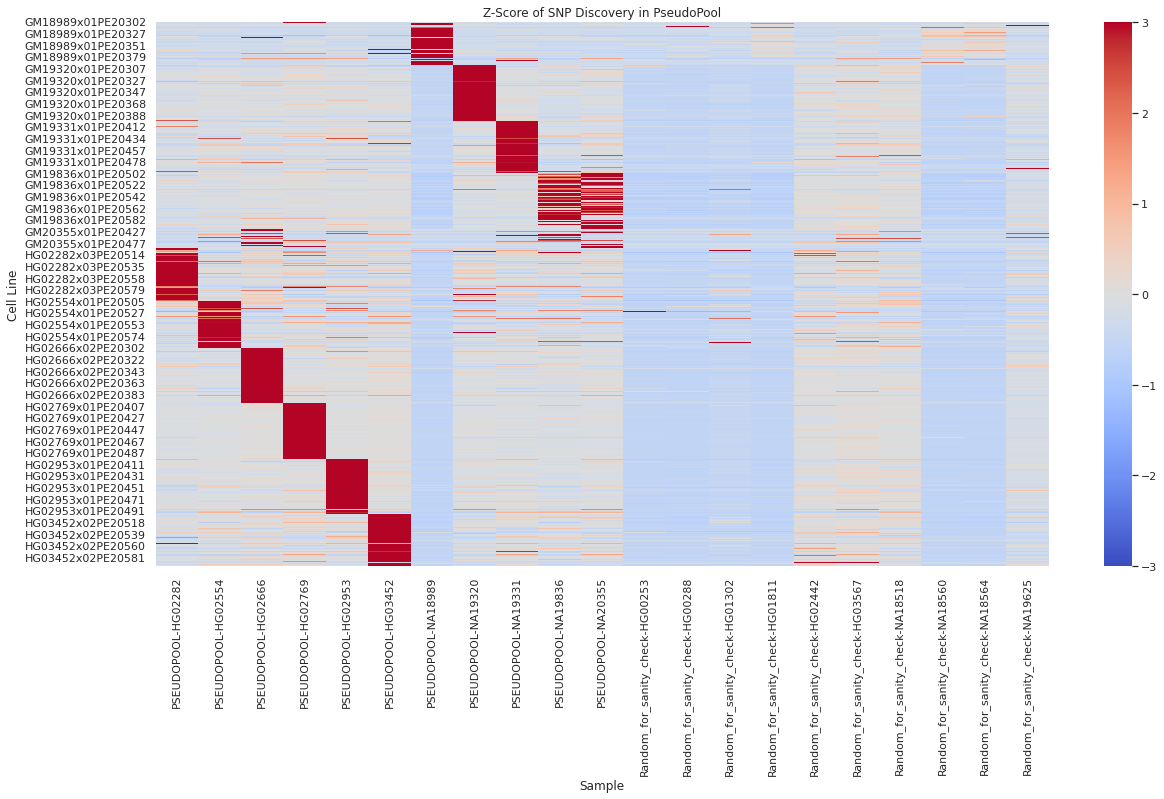

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))
ax = sns.heatmap(pivot_table, cmap="coolwarm", vmin=-3, vmax=3)
ax.set_title("Z-Score of SNP Discovery in PseudoPool")
ax.set_xlabel("Sample")
ax.set_ylabel("Cell Line")
ax

In [13]:
gb_sample_count_stats = gb_sample_count.rename(columns={"cell_line": "cell"})
gb_sample_count_stats = pd.merge(gb_sample_count_stats, combine_ashleys_mc_stats, on=["cell"], how="inner")
gb_sample_count_stats = gb_sample_count_stats.loc[gb_sample_count_stats["prediction"] == 1]
gb_sample_count_stats

,cell,GlobalSample,SAMPLE,ID,prediction,probability,sample,medbin,mapped,suppl,dupl,mapq,read2,good,pass1,nb_p,nb_r,nb_a,bam
17,GM18989x01PE20305,PSEUDOPOOL,HG02282,4,1,0.9126,GM18989x01,22,2568394,1836,1756578,142321,333031,334628,1,0.109957,2.889870,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
18,GM18989x01PE20305,PSEUDOPOOL,HG02554,2,1,0.9126,GM18989x01,22,2568394,1836,1756578,142321,333031,334628,1,0.109957,2.889870,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
19,GM18989x01PE20305,PSEUDOPOOL,HG02666,3,1,0.9126,GM18989x01,22,2568394,1836,1756578,142321,333031,334628,1,0.109957,2.889870,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
20,GM18989x01PE20305,PSEUDOPOOL,HG02769,3,1,0.9126,GM18989x01,22,2568394,1836,1756578,142321,333031,334628,1,0.109957,2.889870,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
21,GM18989x01PE20305,PSEUDOPOOL,HG02953,1,1,0.9126,GM18989x01,22,2568394,1836,1756578,142321,333031,334628,1,0.109957,2.889870,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13567,HG03452x02PE20582,Random_for_sanity_check,HG02442,20,1,0.5979,HG03452x02,18,2369787,1455,1738304,91724,268407,269897,1,0.020650,0.393913,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
13568,HG03452x02PE20582,Random_for_sanity_check,HG03567,25,1,0.5979,HG03452x02,18,2369787,1455,1738304,91724,268407,269897,1,0.020650,0.393913,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
13569,HG03452x02PE20582,Random_for_sanity_check,NA18518,31,1,0.5979,HG03452x02,18,2369787,1455,1738304,91724,268407,269897,1,0.020650,0.393913,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...
13570,HG03452x02PE20582,Random_for_sanity_check,NA18560,1,1,0.5979,HG03452x02,18,2369787,1455,1738304,91724,268407,269897,1,0.020650,0.393913,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-05-12...


In [14]:
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
pivot_table_stats = pd.pivot_table(gb_sample_count_stats, columns=["GlobalSample", "SAMPLE"], index="cell", values="ID").fillna(0)
import scipy.stats as stats
pivot_table_stats_zscore = pivot_table_stats.apply(lambda x: stats.zscore(x), axis=1)
pivot_table_stats_zscore

GlobalSample      PSEUDOPOOL                                          \
SAMPLE               HG02282   HG02554   HG02666   HG02769   HG02953   
cell                                                                   
GM18989x01PE20305  -0.154847 -0.284918 -0.219883 -0.219883 -0.349954   
GM18989x01PE20313  -0.129017 -0.403879 -0.364613 -0.089751 -0.246815   
GM18989x01PE20317  -0.207433 -0.207433 -0.381676 -0.323595 -0.149351   
GM18989x01PE20321  -0.204943 -0.139734 -0.400571 -0.465780 -0.270152   
GM18989x01PE20322  -0.355178 -0.193031 -0.274105 -0.355178 -0.355178   
...                      ...       ...       ...       ...       ...   
HG03452x02PE20573  -0.142116  0.000000  0.040605 -0.162419  0.040605   
HG03452x02PE20574  -0.081056 -0.081056 -0.128338  0.249922  0.108074   
HG03452x02PE20579  -0.148230 -0.037058  0.129702 -0.018529  0.111173   
HG03452x02PE20580  -0.010927 -0.218533  0.076486 -0.098340 -0.010927   
HG03452x02PE20582  -0.143288 -0.012460  0.249196  0.118368  0.039871   

GlobalSample                                                                   \
SAMPLE              HG03452   NA18989   NA19320   NA19331   NA19836   NA20355   
cell                                                                            
GM18989x01PE20305 -0.414990  4.397655 -0.089811 -0.414990 -0.349954  0.040260   
GM18989x01PE20313 -0.129017  4.425838 -0.325347 -0.246815 -0.207549 -0.325347   
GM18989x01PE20317 -0.207433  4.439057 -0.149351 -0.207433 -0.265514 -0.323595   
GM18989x01PE20321 -0.400571  4.359702 -0.400571 -0.139734 -0.335362 -0.270152   
GM18989x01PE20322 -0.274105  4.428142 -0.193031 -0.274105 -0.193031 -0.355178   
...                     ...       ...       ...       ...       ...       ...   
HG03452x02PE20573  4.344701 -0.548163 -0.081209 -0.081209 -0.060907 -0.020302   
HG03452x02PE20574  4.292580 -0.601164  0.060792 -0.293827 -0.151980 -0.010132   
HG03452x02PE20579  4.280155 -0.629980 -0.018529  0.037058  0.000000  0.055586   
HG03452x02PE20580  4.326949 -0.579112  0.021853 -0.098340  0.021853  0.032780   
HG03452x02PE20582  4.278690 -0.614267 -0.038625  0.039871 -0.195619 -0.117122   

GlobalSample      Random_for_sanity_check                                \
SAMPLE                            HG00253   HG00288   HG01302   HG01811   
cell                                                                      
GM18989x01PE20305               -0.414990 -0.349954 -0.284918  0.235367   
GM18989x01PE20313               -0.403879 -0.325347 -0.207549  0.067313   
GM18989x01PE20317               -0.323595 -0.381676 -0.323595  0.082973   
GM18989x01PE20321               -0.400571 -0.270152 -0.139734  0.055894   
GM18989x01PE20322               -0.193031 -0.274105 -0.274105  0.212335   
...                                   ...       ...       ...       ...   
HG03452x02PE20573               -0.548163 -0.548163 -0.487256 -0.527861   
HG03452x02PE20574               -0.577523 -0.577523 -0.435675 -0.553881   
HG03452x02PE20579               -0.611451 -0.611451 -0.500278 -0.611451   
HG03452x02PE20580               -0.557259 -0.557259 -0.502625 -0.568185   
HG03452x02PE20582               -0.588102 -0.614267 -0.509605 -0.588102   

GlobalSample                                                                   
SAMPLE              HG02442   HG03567   NA18518   NA18560   NA18564   NA19625  
cell                                                                           
GM18989x01PE20305 -0.349954 -0.219883 -0.414990 -0.089811  0.170332 -0.219883  
GM18989x01PE20313 -0.246815 -0.286081 -0.286081 -0.129017  0.185111 -0.325347  
GM18989x01PE20317 -0.381676 -0.149351 -0.091270 -0.265514  0.024892 -0.207433  
GM18989x01PE20321 -0.335362 -0.400571 -0.400571  0.316730  0.381940 -0.139734  
GM18989x01PE20322 -0.193031 -0.355178 -0.355178  0.050188 -0.111958 -0.111958  
...                     ...       ...       ...       ...       ...       ...  
HG03452x02PE20573  0.040605  0.142116 -0.162419 -0.527861 -0.527861 -0.182721  
HG034

<Axes: title={'center': 'Matched SNP nb in PseudoPool (Raw counts)'}, xlabel='Sample', ylabel='Cell Line'>

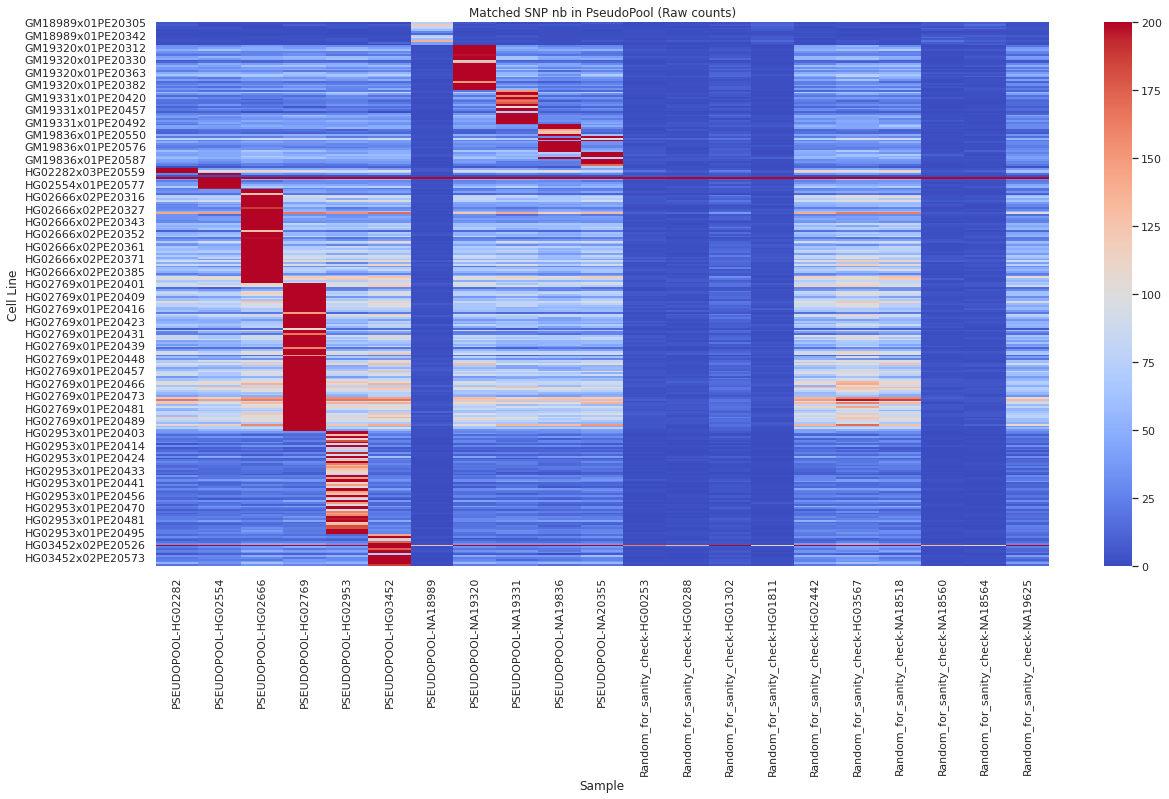

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))
ax = sns.heatmap(pivot_table_stats, cmap="coolwarm", vmin=0, vmax=200)
ax.set_title("Matched SNP nb in PseudoPool (Raw counts)")
ax.set_xlabel("Sample")
ax.set_ylabel("Cell Line")
ax

<Axes: title={'center': 'Matched SNP nb in PseudoPool (z-score adjusted)'}, xlabel='Sample', ylabel='Cell Line'>

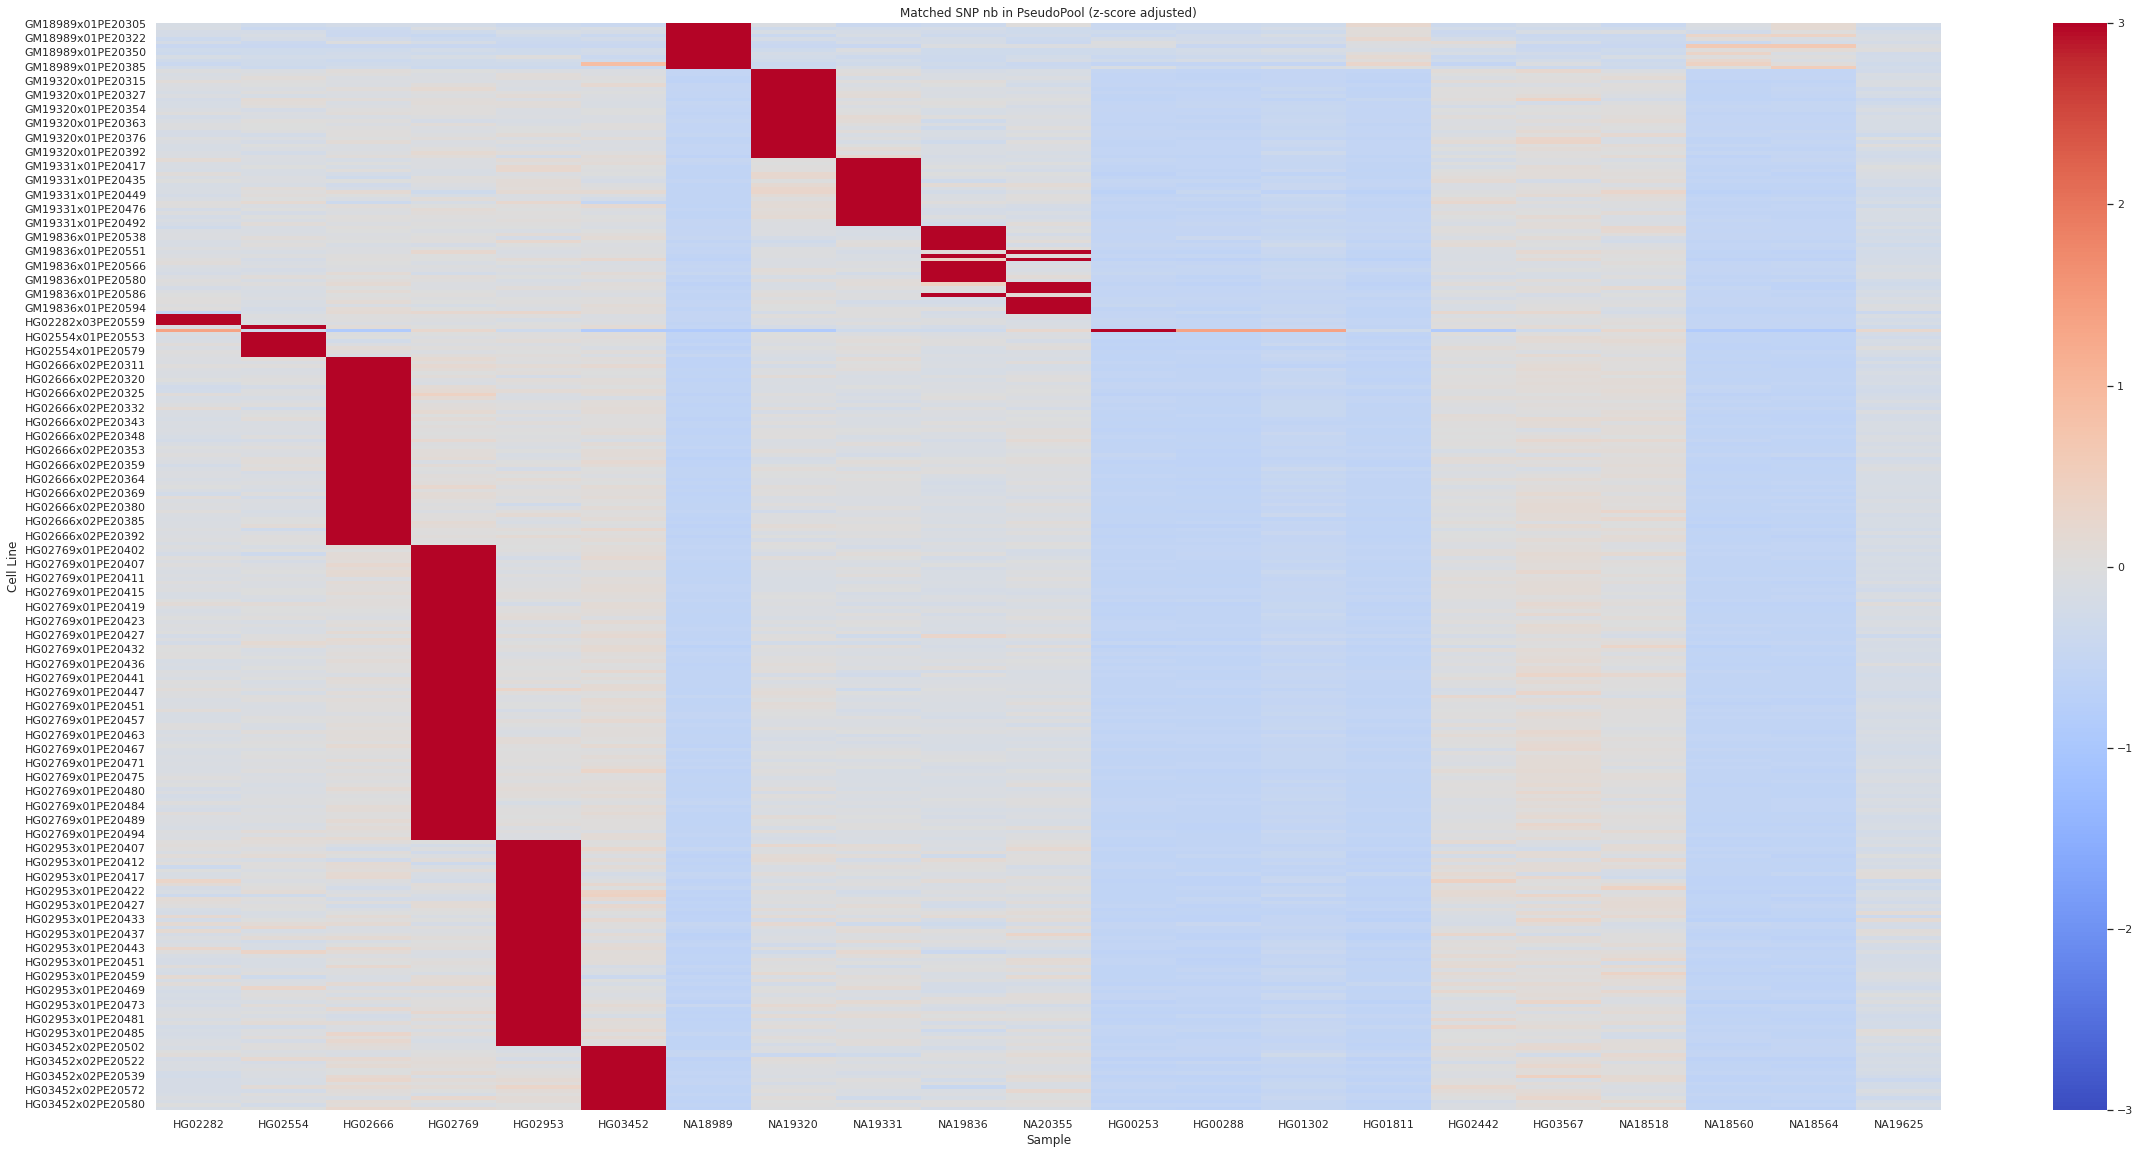

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(40,20))
ax = sns.heatmap(pivot_table_stats_zscore, cmap="coolwarm", vmin=-3, vmax=3)
ax.set_title("Matched SNP nb in PseudoPool (z-score adjusted)")
ax.set_xlabel("Sample")
ax.set_ylabel("Cell Line")

ax

In [19]:
pivot_table_stats_zscore.columns = pivot_table_stats_zscore.columns.droplevel()
pivot_table_stats_zscore_melt = pivot_table_stats_zscore.melt(
    ignore_index=False,
    var_name="SAMPLE",
    value_name="SNP nb (z-score adjusted)",
).reset_index()   
pivot_table_stats_zscore_melt["Sample_to_find"] = pivot_table_stats_zscore_melt["cell"].apply(lambda r: r.split("x")[0].replace("GM", "NA"))
# retrieve the Sample with highest SNP nb
pivot_table_stats_zscore_melt = pivot_table_stats_zscore_melt.loc[pivot_table_stats_zscore_melt.groupby("cell")["SNP nb (z-score adjusted)"].idxmax()]
pivot_table_stats_zscore_melt.loc[pivot_table_stats_zscore_melt["Sample_to_find"] == pivot_table_stats_zscore_melt["SAMPLE"], "Match"] = True
pivot_table_stats_zscore_melt.loc[pivot_table_stats_zscore_melt["Sample_to_find"] != pivot_table_stats_zscore_melt["SAMPLE"], "Match"] = False
pivot_table_stats_zscore_melt

,cell,SAMPLE,SNP nb (z-score adjusted),Sample_to_find,Match
1836,GM18989x01PE20305,NA18989,4.397655,NA18989,True
1837,GM18989x01PE20313,NA18989,4.425838,NA18989,True
1838,GM18989x01PE20317,NA18989,4.439057,NA18989,True
1839,GM18989x01PE20321,NA18989,4.359702,NA18989,True
1840,GM18989x01PE20322,NA18989,4.428142,NA18989,True
...,...,...,...,...,...
1831,HG03452x02PE20573,HG03452,4.344701,HG03452,True
1832,HG03452x02PE20574,HG03452,4.292580,HG03452,True
1833,HG03452x02PE20579,HG03452,4.280155,HG03452,True
1834,HG03452x02PE20580,HG03452,4.326949,HG03452,True


In [1]:
false_match = pivot_table_stats_zscore_melt.loc[pivot_table_stats_zscore_melt["Match"] == False]
false_match = pd.merge(false_match, gb_sample_count_stats, on=["cell", "SAMPLE"], how="inner")
false_match.cell.values

NameError: name 'pivot_table_stats_zscore_melt' is not defined